## Apply Basic Machine Learning Models

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import sys
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
nsplit = 3

/home/ayush/anaconda2/lib/python2.7/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


### Load the Dataset

In [3]:
librosa_fma_small_data = pd.read_csv('librosa_fma_small_data.csv',header=0,sep=',')
librosa_fma_small_data = librosa_fma_small_data.reset_index(drop=True)
librosa_fma_small_data = librosa_fma_small_data.dropna()

### Checking for Null Values

In [4]:
librosa_fma_small_data.isnull().values.any()

False

### Separating the Labels

In [5]:
def remove_duplicate(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

fma_small_parent_genre_id = librosa_fma_small_data['parent_genre_id']
fma_small_parent_genre_title = librosa_fma_small_data['parent_genre_title']

fma_small_parent_genre_title_no_duplicate = remove_duplicate(fma_small_parent_genre_title)

print 'Parent_Title_List Size', len(fma_small_parent_genre_title_no_duplicate)
print fma_small_parent_genre_title_no_duplicate, remove_duplicate(fma_small_parent_genre_id)

#Calculating the total number of Genres in FMA Small
print 'Number of Parent Genres in FMA Small: ', len(set(fma_small_parent_genre_title))

# Dropping Parents_genre_title, parent_genre_id, track_id
librosa_fma_small_data = librosa_fma_small_data.drop(['parent_genre_title','parent_genre_id','track_id'],axis=1)

Parent_Title_List Size 8
['Hip-Hop', 'Pop', 'Folk', 'Experimental', 'Rock', 'International', 'Electronic', 'Instrumental'] [21.0, 10.0, 17.0, 38.0, 12.0, 2.0, 15.0, 1235.0]
Number of Parent Genres in FMA Small:  8


In [6]:
print librosa_fma_small_data.shape

(8000, 518)


### Applying ML Methods

#### Note: Here we are creating training dataset (80%), validation (10%), test dataset(10%)

In [7]:
# Apply Data Preprocessing
def apply_data_split_preprocessing(raw_dataset,labels):

    # Perform Basic Preprocessing and Train, Validation Split
    X_train, X_test, y_train, y_test = train_test_split(raw_dataset,labels,test_size=0.10,random_state=42,stratify=labels)
    
    X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.10,random_state=30,stratify=y_train)
    
    # Apply Basic Preprocessing Steps

    print 'Applying Data Preprocessing'

    min_max_scaler = preprocessing.MinMaxScaler()
    X_train_minmax = min_max_scaler.fit_transform(X_train)
    X_val_minmax = min_max_scaler.transform(X_val)
    X_test_minmax = min_max_scaler.transform(X_test)

    return X_train_minmax, X_val_minmax, X_test_minmax ,y_train, y_val ,y_test


#-----------------------------------------------------------------------------------------------------------

def apply_logistic_regression(X_train_preprocessed, X_test_preprocessed, y_train, y_test,class_names_list):
    
    print 'Applying Logistic Regression'

    # Training the classifier
    classifier = LogisticRegression()
    classifier = classifier.fit(X_train_preprocessed,y_train)

    # Testing the classifier on Test Data
    y_test_pred = classifier.predict(X_test_preprocessed)

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)
    print 'The accuracy achieved by the Logistic Regression Classifier Model is: ', acc
    
    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print 'The F1 Score achieved by the Logistic Rgeression Classifier Model is:', f1score
    
    #Compute Area Under ROC Curve
    #fpr, tpr, thresholds = roc_curve(y_test_pred, y_test)
    #roc_auc = auc(fpr, tpr)
    #print 'The ROC Curve for Logistic Regression Classifier Model is:', roc_auc
    # Computing Confusion Matrix
    cnf_matrix = confusion_matrix(y_test, y_test_pred)
    #print cnf_matrix
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    #plt.figure()
    #plot_confusion_matrix(cnf_matrix, target_names=class_names_list,title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, target_names=class_names_list, normalize=True, title='Normalized confusion matrix')

#-----------------------------------------------------------------------------------------------------------
# Apply Decision_Tree

def apply_decision_tree(X_train_preprocessed, X_test_preprocessed, y_train, y_test,class_names_list):

    print 'Applying Decision Tree Classifier'

    # Training the classifier
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train_preprocessed, y_train)

    # Testing the classifier on Test Data
    y_test_pred = clf.predict(X_test_preprocessed) 

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)
    print 'The accuracy achieved by the Decision Tree Model is: ', acc
    
    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print 'The F1 Score achieved by the Decision Tree Model is:', f1score

#----------------------------------------------------------------------------------------------------------
# Apply Random Forest

def apply_random_forest(X_train_preprocessed, X_test_preprocessed, y_train, y_test,class_names_list):

    print 'Applying Random Forest'

    # Training the classifier
    classifier = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    classifier = classifier.fit(X_train_preprocessed,y_train)

    # Testing the classifier on Test Data
    y_test_pred = classifier.predict(X_test_preprocessed) 

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)
    print 'The accuracy achieved by the Random Forest Classifier Model is: ', acc
    
    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print 'The F1 Score achieved by the Random Forest Classifier Model is:', f1score


#-------------------------------------------------------------------------------------------------------------
# Apply Multi-Class Support Vector Classification. Make sure for probabilities we use Platts Scaling

def apply_multi_class_svc(X_train_preprocessed, X_test_preprocessed, y_train, y_test,class_names_list):

    print 'Applying Multi-Class SVC'

    clf = SVC(gamma='auto')
    clf = clf.fit(X_train_preprocessed,y_train)

    # Testing the Classifier on Test Data
    y_test_pred = clf.predict(X_test_preprocessed)

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)
    print 'The accuracy achieved by Support Vector Classifier is: ', acc
    
    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print 'The F1 Score achieved by the Suppport Vector Classifier Model is:', f1score

#-------------------------------------------------------------------------------------------------------------

# Apply Multi-Class Nu Support Vector Classification. Make sure for probabilities we use Platts Scaling

def apply_multi_class_nusvc(X_train_preprocessed, X_test_preprocessed, y_train, y_test,class_names_list):

    print 'Applying Multi-Class NuSVC'

    clf = NuSVC(gamma='scale',kernel='rbf')
    clf = clf.fit(X_train_preprocessed,y_train)

    # Testing the Classifier on Test Data
    y_test_pred = clf.predict(X_test_preprocessed)

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)
    print 'The accuracy achieved by Nu Support Vector Classifier is: ', acc
    
    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print 'The F1 Score achieved by the Nu Support Vector Classifier Model is:', f1score
    
    # Computing Confusion Matrix
    cnf_matrix = confusion_matrix(y_test, y_test_pred)
    #print cnf_matrix
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    #plt.figure()
    #plot_confusion_matrix(cnf_matrix, target_names=class_names_list,title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, target_names=class_names_list, normalize=True, title='Normalized confusion matrix')

#-------------------------------------------------------------------------------------------------------------
# Apply Linear SVC

def apply_multi_class_linear_svc(X_train_preprocessed, X_test_preprocessed, y_train, y_test,class_names_list):

    print 'Applying Multi-Class Linear SVC'

    clf = LinearSVC(random_state=0, tol=1e-5)
    clf = clf.fit(X_train_preprocessed,y_train)

    # Testing the Classifier on Test Data
    y_test_pred = clf.predict(X_test_preprocessed)

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)
    print 'The accuracy achieved by Linear Support Vector Classifier is: ', acc
    
    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print 'The F1 Score achieved by the Linear Support Vector Classifier is:', f1score
    
    # Computing Confusion Matrix
    cnf_matrix = confusion_matrix(y_test, y_test_pred)
    #print cnf_matrix
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    #plt.figure()
    #plot_confusion_matrix(cnf_matrix, target_names=class_names_list,title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, target_names=class_names_list, normalize=True, title='Normalized confusion matrix')
    
#-------------------------------------------------------------------------------------------------------------
# Apply Gradient Boosting

def apply_gradient_boosting(X_train_preprocessed, X_test_preprocessed, y_train, y_test,class_names_list):

    print 'Applying Gradient Boosting'

    # Training the classifier
    classifier = GradientBoostingClassifier(n_estimators=100)
    classifier = classifier.fit(X_train_preprocessed,y_train)
    
    # Testing the classifier on Test Data
    y_test_pred = classifier.predict(X_test_preprocessed)

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)
    print 'The accuracy achieved by the Gradient Boosting Classifier Model is: ', acc
    
    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print 'The F1 Score achieved by the Gradient Boosting Classifier is:', f1score

#-------------------------------------------------------------------------------------------------------------
# Apply Adaboost Classifier

def apply_adaboost_classifier(X_train_preprocessed, X_test_preprocessed, y_train, y_test,class_names_list):

    print 'Applying AdaBoost Classifier'

    # Training the classifier
    classifier = AdaBoostClassifier(n_estimators=100)
    classifier = classifier.fit(X_train_preprocessed,y_train)

    # Testing the classifier on Test Data
    y_test_pred = classifier.predict(X_test_preprocessed) 

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)
    print 'The accuracy achieved by the Adaboost Classifier Model is: ', acc
    
    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print 'The F1 Score achieved by the Adaboost Classifier Model is:', f1score

#-----------------------------------------------------------------------------------------------------------------
# Apply Extra Trees

def apply_extratree_classifier(X_train_preprocessed, X_test_preprocessed, y_train, y_test,class_names_list):

    print 'Applying Extra Tree Classifier'

    # Training the classifier
    classifier = ExtraTreesClassifier(n_estimators=100)
    classifier = classifier.fit(X_train_preprocessed,y_train)

    # Testing the classifier on Test Data
    y_test_pred = classifier.predict(X_test_preprocessed)

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)
    print 'The accuracy achieved by the Extra Tree Classifier Model is: ', acc
    
    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print 'The F1 Score achieved by the Extra Tree Classifier Model is:', f1score

#------------------------------------------------------------------------------------------------------------------
# Apply Gradient Boosting from XgBoost

def apply_xgboost_gradient_boosting(X_train_preprocessed, X_test_preprocessed, y_train, y_test,class_names_list):

    print 'Applying XGBoost Gradient Boosting'

    model = XGBClassifier()
    model.fit(X_train_preprocessed, y_train)

    y_test_pred_values = model.predict(X_test_preprocessed)
    y_test_pred = [round(value) for value in y_test_pred_values]

    # Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)
    print 'The accuracy achieved by the Gradient Boosting Model from XgBoost is: ', acc
    
    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print 'The F1 Score achieved by the Gradient Boosting Model from XgBoost is:', f1score
    
    # Computing Confusion Matrix
    cnf_matrix = confusion_matrix(y_test, y_test_pred)
    #print cnf_matrix
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    #plt.figure()
    #plot_confusion_matrix(cnf_matrix, target_names=class_names_list,title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, target_names=class_names_list, normalize=True, title='Normalized confusion matrix')
    
#--------------------------------------------------------------------------------------------------------
#Plot Confusion Matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig('./confusion_matrix.png')


In [8]:
librosa_fma_small_data_array = librosa_fma_small_data.values
print librosa_fma_small_data_array.shape

#print remove_duplicate(list(fma_small_parent_genre_id))

(8000, 518)


#### Data Preprocessing and Splitting

In [9]:
# Preprocess data
X_train_preprocessed, X_val_preprocessed ,X_test_preprocessed, y_train, y_val ,y_test = apply_data_split_preprocessing(librosa_fma_small_data_array,fma_small_parent_genre_id)

print 'Training Dataset Size: ', X_train_preprocessed.shape, y_train.shape
print 'Validation Dataset Size: ', X_val_preprocessed.shape, y_val.shape
print 'Testing Dataset Size: ', X_test_preprocessed.shape, y_test.shape

Applying Data Preprocessing


/home/ayush/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Training Dataset Size:  (6480, 518) (6480,)
Validation Dataset Size:  (720, 518) (720,)
Testing Dataset Size:  (800, 518) (800,)


### Training and Testing the Classifiers

Applying Logistic Regression


/home/ayush/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ayush/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The accuracy achieved by the Logistic Regression Classifier Model is:  0.593055555556
The F1 Score achieved by the Logistic Rgeression Classifier Model is: 0.58822506924


<Figure size 432x288 with 0 Axes>

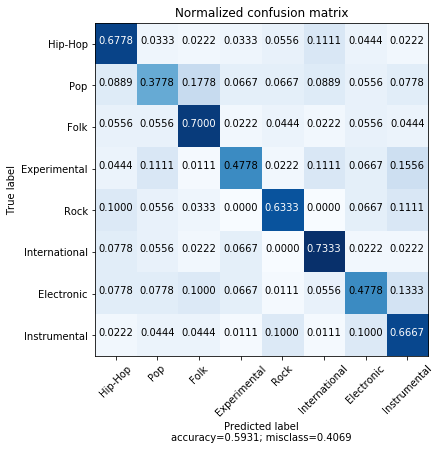

In [27]:
#Apply Logistic Regression
#apply_logistic_regression(X_train_preprocessed,X_val_preprocessed,y_train,y_val,fma_small_parent_genre_title_no_duplicate)

# Apply Decision Tree
#apply_decision_tree(X_train_preprocessed,X_val_preprocessed,y_train,y_val,fma_small_parent_genre_title_no_duplicate)

# Apply Random Forest
#apply_random_forest(X_train_preprocessed,X_val_preprocessed,y_train,y_val,fma_small_parent_genre_title_no_duplicate)

# Apply MultiClass SVC
#apply_multi_class_svc(X_train_preprocessed,X_val_preprocessed,y_train,y_val,fma_small_parent_genre_title_no_duplicate)

#Apply MultiClass NuSVC
#apply_multi_class_nusvc(X_train_preprocessed, X_val_preprocessed, y_train, y_val,fma_small_parent_genre_title_no_duplicate)

# Apply Gradient Boosting
#apply_gradient_boosting(X_train_preprocessed,X_val_preprocessed,y_train,y_val,fma_small_parent_genre_title_no_duplicate)

# Apply Adaboost Classifier
#apply_adaboost_classifier(X_train_preprocessed,X_val_preprocessed,y_train,y_val,fma_small_parent_genre_title_no_duplicate)

# Apply Extra Trees
#apply_extratree_classifier(X_train_preprocessed,X_val_preprocessed,y_train,y_val,fma_small_parent_genre_title_no_duplicate)

# Apply Linear SVC
#apply_multi_class_linear_svc(X_train_preprocessed,X_val_preprocessed,y_train,y_val,fma_small_parent_genre_title_no_duplicate)

# Apply Gradient Boosting from XgBoost
#apply_xgboost_gradient_boosting(X_train_preprocessed, X_val_preprocessed, y_train, y_val,fma_small_parent_genre_title_no_duplicate)

### Stratified 5 Fold Cross Validation with XgBoost with Grid Search

In [ ]:
def apply_stratified_kfold_crossval_xgboost_grid_search(X_train_preprocessed,train_targets,nsplit):

    print 'Apply Stratified Cross Validation and Grid Search'

    parameter_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

    xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

    cross_validation = StratifiedKFold(n_splits=nsplit)

    grid_search = GridSearchCV(xgb,
                              scoring='accuracy',
                              param_grid=parameter_grid,
                              cv=cross_validation,
                              verbose=1
                             )

    grid_search.fit(X_train_preprocessed, y_train)
    tuned_model = grid_search
    parameters = grid_search.best_params_
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

    return tuned_model

### Testing the Performance on Test Dataset

In [ ]:
tuned_model_grid = apply_stratified_kfold_crossval_xgboost_grid_search(X_train_preprocessed,y_train,nsplit)

In [ ]:
y_test_pred_values = tuned_model_grid.predict(X_test_preprocessed)
y_test_pred = [round(value) for value in y_test_pred_values]

#Compute Accuracy Score
acc = accuracy_score(y_test,y_test_pred,normalize=True)
print 'The accuracy achieved by the Tuned Classifier Model is: ', acc
    
#Compute F1 Score
f1score = f1_score(y_test, y_test_pred,average='weighted')
print 'The F1 Score achieved by the Tuned Classifier Model is:', f1score

### Stratified 5 Fold Cross Validation with XgBoost with Randomized Search

In [10]:
def apply_stratified_kfold_crossval_xgboost_random_search(X_train_preprocessed,train_targets,nsplit):

    print 'Apply Stratified Cross Validation and Random Search'

    parameter_dist = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4]
        }

    xgb = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1)

    cross_validation = StratifiedKFold(n_splits=nsplit)

    random_search = RandomizedSearchCV(xgb,
                              scoring='accuracy',
                              param_distributions=parameter_dist,
                              cv=cross_validation,
                              verbose=1
                             )

    random_search.fit(X_train_preprocessed, y_train)
    tuned_model = random_search
    parameters = random_search.best_params_
    print('Best score: {}'.format(random_search.best_score_))
    print('Best parameters: {}'.format(random_search.best_params_))

    return tuned_model

### Testing the Performance

In [11]:
tuned_model_random = apply_stratified_kfold_crossval_xgboost_random_search(X_train_preprocessed,y_train,nsplit)

Apply Stratified Cross Validation and Random Search
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 23.8min finished


Best score: 0.545679012346
Best parameters: {'subsample': 0.6, 'gamma': 2, 'colsample_bytree': 0.6, 'max_depth': 4, 'min_child_weight': 1}


In [12]:
y_test_pred_values = tuned_model_random.predict(X_test_preprocessed)
y_test_pred = [round(value) for value in y_test_pred_values]

#Compute Accuracy Score
acc = accuracy_score(y_test,y_test_pred,normalize=True)
print 'The accuracy achieved by the Tuned Classifier Model is: ', acc
    
#Compute F1 Score
f1score = f1_score(y_test, y_test_pred,average='weighted')
print 'The F1 Score achieved by the Tuned Classifier Model is:', f1score

The accuracy achieved by the Tuned Classifier Model is:  0.525
The F1 Score achieved by the Tuned Classifier Model is: 0.515420040658
